In [77]:
import numpy as np
import torch

In [78]:
# set logger and enforce reproducibility
from GPErks.log.logger import get_logger
from GPErks.utils.random import set_seed
log = get_logger()
seed = 8
set_seed(seed)  # reproducible sampling

**2D function example**: Currin et al. (1988)

$f(x) = \left[1 - \exp{\left(1 - \dfrac{1}{2 x_2}\right)}\right]\,\left(\dfrac{2300 x_{1}^3 + 1900 x_{1}^2 + 2092 x_{1} + 60}{100 x_{1}^3 + 500 x_{1}^2 + 4 x_{1} + 20}\right)$

In [79]:
# function to learn (normally a high-dimensional, expensive deterministic model)
from GPErks.utils.test_functions import currin_exp
f = lambda X: np.array([currin_exp(x) for x in X])
D = 2

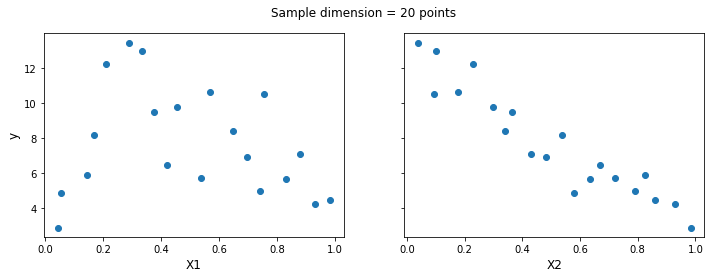

In [80]:
# build dataset
from GPErks.gp.data.dataset import Dataset
dataset = Dataset.build_from_function(
    f,
    D,
    n_train_samples=20,
    n_test_samples=25,
    design="lhs",
    seed=seed,
)
dataset.plot()

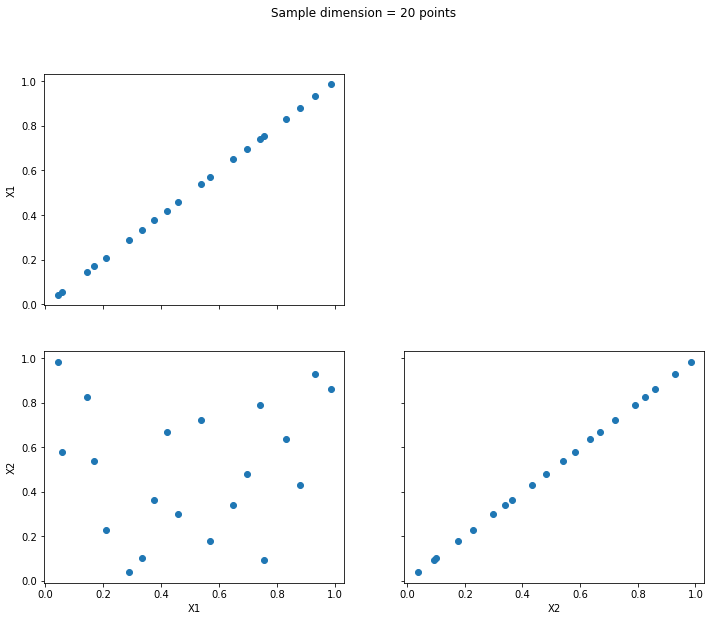

In [81]:
dataset.plot_pairwise()

In [82]:
# choose likelihood
from gpytorch.likelihoods import GaussianLikelihood
likelihood = GaussianLikelihood()

In [83]:
# choose mean function
from gpytorch.means import LinearMean
mean_function = LinearMean(input_size=dataset.input_size)

In [84]:
# choose kernel
from gpytorch.kernels import RBFKernel, ScaleKernel
kernel = ScaleKernel(RBFKernel(ard_num_dims=dataset.input_size))

In [85]:
# choose metrics
from torchmetrics import MeanSquaredError, R2Score
metrics = [MeanSquaredError(), R2Score()]

In [86]:
# define experiment
from GPErks.gp.experiment import GPExperiment
experiment = GPExperiment(
    dataset,
    likelihood,
    mean_function,
    kernel,
    n_restarts=3,
    metrics=metrics,
    seed=seed  # reproducible training
)

In [87]:
# choose training options: device + optimizer
device = "cuda" if torch.cuda.is_available() else "cpu"
optimizer = torch.optim.Adam(experiment.model.parameters(), lr=0.1)

In [88]:
# train model
from GPErks.train.emulator import GPEmulator
emulator = GPEmulator(experiment, device)
emulator.train(optimizer)

INFO:2021-08-03 18:18:02,313:emulator:train:L83: Training emulator...
INFO:2021-08-03 18:18:02,314:emulator:train:L99: Running restart 1...
/home/sl18/Documents/Python/GPErks/venv/lib/python3.8/site-packages/gpytorch/models/exact_gp.py:282: GPInputWarning: The input matches the stored training data. Did you forget to call model.train()?
  warnings.warn(
INFO:2021-08-03 18:18:02,333:emulator:_train_once:L308: [  1/100] Training Loss: 0.8316 - MeanSquaredError: 0.0849 - R2Score: 0.9151
INFO:2021-08-03 18:18:02,340:emulator:_train_once:L308: [  2/100] Training Loss: 0.7894 - MeanSquaredError: 0.0816 - R2Score: 0.9184
INFO:2021-08-03 18:18:02,347:emulator:_train_once:L308: [  3/100] Training Loss: 0.7519 - MeanSquaredError: 0.0795 - R2Score: 0.9205
INFO:2021-08-03 18:18:02,354:emulator:_train_once:L308: [  4/100] Training Loss: 0.7177 - MeanSquaredError: 0.0780 - R2Score: 0.9220
INFO:2021-08-03 18:18:02,362:emulator:_train_once:L308: [  5/100] Training Loss: 0.6858 - MeanSquaredError: 0.07

INFO:2021-08-03 18:18:02,686:emulator:_train_once:L308: [ 60/100] Training Loss: 0.1022 - MeanSquaredError: 0.0129 - R2Score: 0.9871
INFO:2021-08-03 18:18:02,691:emulator:_train_once:L308: [ 61/100] Training Loss: 0.0990 - MeanSquaredError: 0.0127 - R2Score: 0.9873
INFO:2021-08-03 18:18:02,696:emulator:_train_once:L308: [ 62/100] Training Loss: 0.0957 - MeanSquaredError: 0.0126 - R2Score: 0.9874
INFO:2021-08-03 18:18:02,702:emulator:_train_once:L308: [ 63/100] Training Loss: 0.0924 - MeanSquaredError: 0.0125 - R2Score: 0.9875
INFO:2021-08-03 18:18:02,707:emulator:_train_once:L308: [ 64/100] Training Loss: 0.0898 - MeanSquaredError: 0.0125 - R2Score: 0.9875
INFO:2021-08-03 18:18:02,715:emulator:_train_once:L308: [ 65/100] Training Loss: 0.0882 - MeanSquaredError: 0.0125 - R2Score: 0.9875
INFO:2021-08-03 18:18:02,720:emulator:_train_once:L308: [ 66/100] Training Loss: 0.0880 - MeanSquaredError: 0.0125 - R2Score: 0.9875
INFO:2021-08-03 18:18:02,725:emulator:_train_once:L308: [ 67/100] Tra

INFO:2021-08-03 18:18:03,026:emulator:_train_once:L308: [ 21/100] Training Loss: 0.2885 - MeanSquaredError: 0.0109 - R2Score: 0.9891
INFO:2021-08-03 18:18:03,032:emulator:_train_once:L308: [ 22/100] Training Loss: 0.2689 - MeanSquaredError: 0.0096 - R2Score: 0.9904
INFO:2021-08-03 18:18:03,038:emulator:_train_once:L308: [ 23/100] Training Loss: 0.2586 - MeanSquaredError: 0.0091 - R2Score: 0.9909
INFO:2021-08-03 18:18:03,044:emulator:_train_once:L308: [ 24/100] Training Loss: 0.2528 - MeanSquaredError: 0.0091 - R2Score: 0.9909
INFO:2021-08-03 18:18:03,049:emulator:_train_once:L308: [ 25/100] Training Loss: 0.2440 - MeanSquaredError: 0.0095 - R2Score: 0.9905
INFO:2021-08-03 18:18:03,054:emulator:_train_once:L308: [ 26/100] Training Loss: 0.2294 - MeanSquaredError: 0.0102 - R2Score: 0.9898
INFO:2021-08-03 18:18:03,061:emulator:_train_once:L308: [ 27/100] Training Loss: 0.2116 - MeanSquaredError: 0.0111 - R2Score: 0.9889
INFO:2021-08-03 18:18:03,067:emulator:_train_once:L308: [ 28/100] Tra

INFO:2021-08-03 18:18:03,397:emulator:_train_once:L308: [ 83/100] Training Loss: 0.0871 - MeanSquaredError: 0.0149 - R2Score: 0.9851
INFO:2021-08-03 18:18:03,403:emulator:_train_once:L308: [ 84/100] Training Loss: 0.0871 - MeanSquaredError: 0.0149 - R2Score: 0.9851
INFO:2021-08-03 18:18:03,409:emulator:_train_once:L308: [ 85/100] Training Loss: 0.0871 - MeanSquaredError: 0.0149 - R2Score: 0.9851
INFO:2021-08-03 18:18:03,416:emulator:_train_once:L308: [ 86/100] Training Loss: 0.0871 - MeanSquaredError: 0.0150 - R2Score: 0.9850
INFO:2021-08-03 18:18:03,422:emulator:_train_once:L308: [ 87/100] Training Loss: 0.0871 - MeanSquaredError: 0.0151 - R2Score: 0.9849
INFO:2021-08-03 18:18:03,429:emulator:_train_once:L308: [ 88/100] Training Loss: 0.0870 - MeanSquaredError: 0.0152 - R2Score: 0.9848
INFO:2021-08-03 18:18:03,435:emulator:_train_once:L308: [ 89/100] Training Loss: 0.0870 - MeanSquaredError: 0.0152 - R2Score: 0.9848
INFO:2021-08-03 18:18:03,442:emulator:_train_once:L308: [ 90/100] Tra

INFO:2021-08-03 18:18:03,755:emulator:_train_once:L308: [ 44/100] Training Loss: 0.3363 - MeanSquaredError: 0.0451 - R2Score: 0.9549
INFO:2021-08-03 18:18:03,761:emulator:_train_once:L308: [ 45/100] Training Loss: 0.3303 - MeanSquaredError: 0.0461 - R2Score: 0.9539
INFO:2021-08-03 18:18:03,766:emulator:_train_once:L308: [ 46/100] Training Loss: 0.3232 - MeanSquaredError: 0.0468 - R2Score: 0.9532
INFO:2021-08-03 18:18:03,771:emulator:_train_once:L308: [ 47/100] Training Loss: 0.3152 - MeanSquaredError: 0.0473 - R2Score: 0.9527
INFO:2021-08-03 18:18:03,779:emulator:_train_once:L308: [ 48/100] Training Loss: 0.3085 - MeanSquaredError: 0.0476 - R2Score: 0.9524
INFO:2021-08-03 18:18:03,785:emulator:_train_once:L308: [ 49/100] Training Loss: 0.3034 - MeanSquaredError: 0.0477 - R2Score: 0.9523
INFO:2021-08-03 18:18:03,791:emulator:_train_once:L308: [ 50/100] Training Loss: 0.2969 - MeanSquaredError: 0.0475 - R2Score: 0.9525
INFO:2021-08-03 18:18:03,798:emulator:_train_once:L308: [ 51/100] Tra


Bias: 1.2667
Weights: tensor([-0.0557, -2.5851])
Outputscale: 0.1248
Lengthscales: tensor([0.1160, 2.2744])
Likelihood noise: 0.0262


(OrderedDict([('likelihood.noise_covar.raw_noise', tensor([-3.6342])),
              ('mean_module.weights',
               tensor([[-0.0557],
                       [-2.5851]])),
              ('mean_module.bias', tensor([1.2667])),
              ('covar_module.raw_outputscale', tensor(-2.0184)),
              ('covar_module.base_kernel.raw_lengthscale',
               tensor([[-2.0959,  2.1658]]))]),
 <GPErks.train.train_stats.TrainStats at 0x7f207482ef70>)

                   Score
MeanSquaredError  0.7254
R2Score           0.9013


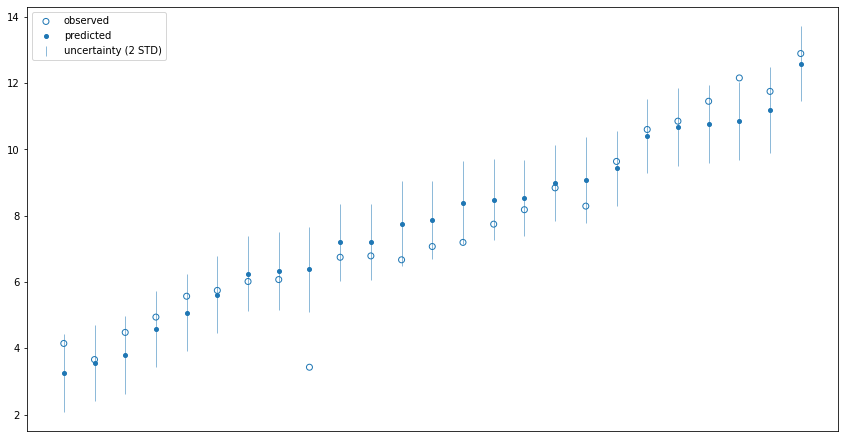

In [89]:
# inference on stored test set
from GPErks.perks.inference import Inference
inference = Inference(emulator)
inference.summary()
inference.plot()

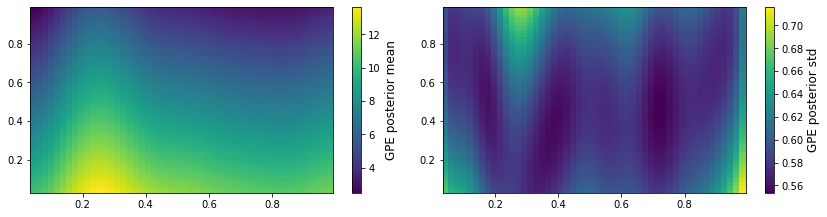

In [90]:
# bonus: inference on 2-dimensional grid
inference.interpolate_2Dgrid()  # can add function f as optional argument

In [91]:
# perk n.2: diagnostics (L.S. Bastos and A. O’Hagan (2009) doi:10.1198/TECH.2009.08019)
from GPErks.perks.diagnostics import Diagnostics
diagnostics = Diagnostics(emulator)

y_mean, y_std, y_covar = emulator.predict(dataset.X_test, with_covar=True)
print( y_covar.shape )

(25, 25)


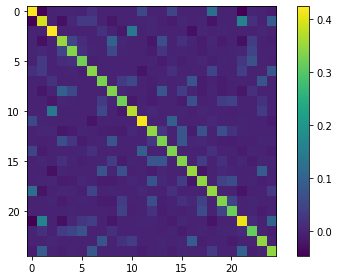

In [92]:
import matplotlib.pyplot as plt
fig, axis = plt.subplots(1, 1)
h = axis.imshow(y_covar)
cbar = fig.colorbar(h, ax=axis)
fig.tight_layout()
plt.show()

In [93]:
diagnostics.summary()

                      Observed  Expected      Std
Chi-Squared            46.6325   25.0000   7.0711
Mahalanobis Distance   44.0925   25.0000  12.1008
Credible Interval       0.9200    0.7896   0.0778


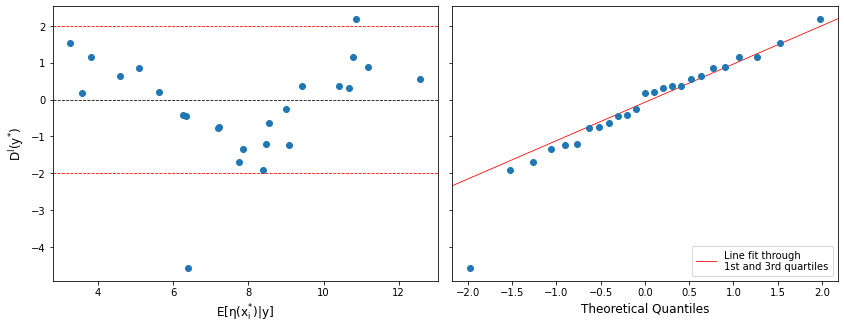

In [94]:
diagnostics.plot(uncorrelated=False)

In [95]:
1 - 2/25

0.92